<a href="https://colab.research.google.com/github/NadeemMughal/Langgraph/blob/main/Langgraph_ChatBot_Book_Appointment_Manually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langchain langchain_core langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15


In [2]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [3]:
import os

# Manually set API Key
os.environ["LANGCHAIN_API_KEY"] = "lsv2_pt_a7f482b7ce1d45019046635519db9108_34b2cd04"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

# Verify the values
print("LangChain API Key:", os.environ.get("LANGCHAIN_API_KEY"))
print("LangChain Tracing Enabled:", os.environ.get("LANGCHAIN_TRACING_V2"))
print("LangChain Project:", os.environ.get("LANGCHAIN_PROJECT"))


LangChain API Key: lsv2_pt_a7f482b7ce1d45019046635519db9108_34b2cd04
LangChain Tracing Enabled: true
LangChain Project: langchain-academy


In [ ]:
from langsmith import Client

client = Client()
projects = list(client.list_projects())  # Convert generator to list

print("Available LangSmith Projects:", projects)


Available LangSmith Projects: [TracerSession(id=UUID('6d1b6c20-055e-42a3-9ec3-c4ed709fd421'), start_time=datetime.datetime(2024, 12, 26, 11, 28, 43, 93393, tzinfo=datetime.timezone.utc), end_time=None, description=None, name="APi's-wala-monitoring", extra=None, tenant_id=UUID('b8629d83-0c4a-5c0b-9fac-4e8632d5c6f3'), reference_dataset_id=None), TracerSession(id=UUID('ba45a214-6c87-41f9-abb2-371383d41d89'), start_time=datetime.datetime(2024, 12, 26, 8, 19, 2, 465114, tzinfo=datetime.timezone.utc), end_time=None, description=None, name="LLM's-Monitoring", extra=None, tenant_id=UUID('b8629d83-0c4a-5c0b-9fac-4e8632d5c6f3'), reference_dataset_id=None), TracerSession(id=UUID('4bf1244f-4aae-4867-abf0-0d7ba832fff2'), start_time=datetime.datetime(2024, 10, 17, 14, 41, 6, 826954, tzinfo=datetime.timezone.utc), end_time=None, description=None, name='First-Project', extra=None, tenant_id=UUID('b8629d83-0c4a-5c0b-9fac-4e8632d5c6f3'), reference_dataset_id=None), TracerSession(id=UUID('096827ce-1403-4

In [ ]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash-exp', api_key= GEMINI_API_KEY, max_output_tokens=1024)
llm

ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-exp', google_api_key=SecretStr('**********'), max_output_tokens=1024, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x79ed305d7510>, default_metadata=())

In [ ]:
from langgraph.graph import START,END,StateGraph,MessagesState
from langgraph.prebuilt import ToolNode

In [ ]:
class State(MessagesState):
  pass

In [ ]:
from langchain_core.tools import tool


@tool
def check_availability(slot: str) -> str:
    """
    Provide available slots for tomorrow or confirm availability of a specific slot.
    if user give any specific time then give response as "Yes, this is available for tomorrow."
    if user want to get "available slots" or "give me available slots" then give response as sample available slots.

    Args:
        slot (str): The time slot to check for availability or a request for available slots.

    Returns:
        str: If checking a specific slot, always returns "Yes, this is available for tomorrow."
             If asking for available slots, returns a list of sample available slots.
    """
    available_slots = ["9:00 AM", "11:00 AM", "1:30 PM", "3:00 PM"]

    if "available slots" in slot.lower() or "give me available slots" in slot.lower():
        return f"Available slots for tomorrow: {', '.join(available_slots)}"

    return "Yes, this is available for tomorrow."



@tool
def book_appointment(name: str, slot: str) -> str:
    """
    Book an appointment for a given time slot if it is available.

    Args:
        name (str): Name of the person booking the appointment.
                    type: string
        slot (str): The desired time slot (e.g., "10:00 AM - 11:00 AM").
                    type: string

    Returns:
        str: Confirmation message for booking or failure message if the slot is unavailable.
             type: string
    """
    if check_availability(slot):
        print(f"Booking appointment for {name} at {slot}.")
        return f"Appointment successfully booked for {name} at {slot}."
    else:
        print(f"Failed to book appointment for {name} at {slot}.")
        return f"Sorry, {slot} is not available for booking."


def sum_times(*args) -> str:
    """
    Calculate the total sum of time durations.

    Args:
        *args: Variable-length argument list of time durations (in minutes).

    Returns:
        str: The total duration of the selected services.
    """
    try:
        total_time = sum(args)
        print(f"The total sum of the provided time durations is: {total_time} minutes")
        return str(total_time)  # Convert to string for consistency in tool calls
    except Exception as e:
        return f"Error in calculating total time: {e}"



In [ ]:
tools = [check_availability, book_appointment]
llm_with_tools  = llm.bind_tools(tools)

In [ ]:
service_provider_name = """

The price for teeth cleaning is $15 and it takes 25 minutes." Similarly, for "root canal," it replies: "The price for root canal is $10 and it takes 20 minutes." and for "teeth scaling," it states: "The price for teeth scaling is $20 and it takes 30 minutes." If the input is invalid, such as "tooth painting," the LLM responds with "Invalid dentist service type.


"""

In [ ]:
from langchain_core.messages import SystemMessage

sys_msg = SystemMessage(content=f"""
You are a professional service provider bot for {service_provider_name}, assisting users in selecting services and then according to selected services go to checking availability, and booking appointments efficiently. Your workflow ensures a smooth user experience by gathering all necessary details before taking any actions.

## Key Responsibilities:

### 1. Gathering User Preferences:
- Prompt users to select one or more services from the available categories.
- Collect and confirm the user's selected services before proceeding.

### 2. Calculating Total Service Time:
- Sum up the time required for all selected services.

### 3. Checking Availability:
- Once the total time is calculated, check available time slots using the `check_availability` tool.
- If the user provides their available time, verify its feasibility.
- If the user does not specify a preferred time, suggest suitable time slots from the availability check.

### 4. Booking an Appointment:
- Once an available slot is confirmed, finalize the booking using the `book_appointment` tool.
- Provide a polite and clear confirmation message upon successful booking.

## Interaction Flow:

1. **Introduction**: Welcome the user and explain your role in managing service appointments.
2. **Service Selection**: Ask the user to select desired services.
3. **Total Time Calculation**: Determine the cumulative duration of the selected services.
4. **Availability Check**: Find suitable time slots based on the total required time.
5. **Appointment Booking**: Confirm the user’s preferred time and book the appointment.

## Error Handling:
- If no available slots match the required duration, suggest alternative times.
- Ensure the user is always informed and provided with options.

## Example Interaction:

**User**: I need a haircut and a facial.
**Bot**: Great choices! A haircut takes 20 minutes, and a facial takes 30 minutes, totaling 50 minutes. Let me check available time slots for you.

**Bot**: Here are available slots for a 50-minute appointment:
- Tomorrow at 10:00 AM
- Tomorrow at 2:00 PM
- The day after tomorrow at 11:00 AM

Which time would you prefer?

**User**: Tomorrow at 10:00 AM.
**Bot**: Your appointment has been successfully booked for tomorrow at 10:00 AM. Thank you!

This ensures a structured, efficient, and user-friendly booking experience.
""")


In [ ]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


# Build Grafrom langgraph.prebuilt import tools_conditionph
builder: StateGraph = StateGraph(state_schema=MessagesState)
builder.add_node("LLM_withTools", llm_with_tools)
builder.add_node("tools", ToolNode(tools))



In [ ]:
builder.add_edge(START, "LLM_withTools")
builder.add_conditional_edges("LLM_withTools", tools_condition)
builder.add_edge("tools","LLM_withTools")
#builder.add_edge("tools", END)
from langgraph.graph.state import CompiledStateGraph
graph: CompiledStateGraph = builder.compile()

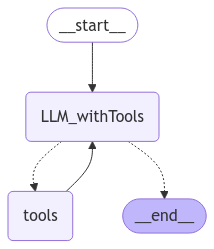

In [ ]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    print("[DEBUG] Invoking LLM with current state messages...")
    print("[DEBUG] Current messages:", [msg.content for msg in state['messages']])

    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])
    print("[DEBUG] LLM Response received:", llm_response.content)

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        print("[DEBUG] Tool call detected:", tool_calls)
        tool_name = tool_calls.get("name", "")
        tool_args = tool_calls.get("arguments", "{}")

        try:
            tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary
            print("[DEBUG] Parsed tool arguments:", tool_args)
        except Exception as e:
            print("[ERROR] Failed to parse tool arguments:", e)
            tool_args = {}

        # Find and invoke the correct tool
        tool_result = "Tool not found or execution failed."
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                    if not tool_result:
                        tool_result = "I'm sorry, but I couldn't retrieve the requested information."
                except Exception as e:
                    print("[ERROR] Tool execution failed:", e)
                    tool_result = f"Error invoking tool: {e}"
                break

        print("[DEBUG] Tool result:", tool_result)

        # Append tool result to the state only if it's valid
        if tool_result and isinstance(tool_result, str):
            tool_result_message = HumanMessage(content=tool_result)
            state['messages'].append(tool_result_message)
        else:
            print("[ERROR] Invalid tool result, skipping appending to state.")

        print("[DEBUG] Re-invoking LLM with updated messages...")
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        print("[DEBUG] Final LLM response received:", final_response.content)
        state['messages'].append(final_response)
    else:
        print("[DEBUG] No tool call detected, appending LLM response directly.")
        state['messages'].append(llm_response)

    # Validate state messages before returning
    for msg in state['messages']:
        if not msg.content:
            print("[WARNING] Found an empty message in state['messages']!")

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi']
[DEBUG] LLM Response received: Hello! I'm here to assist you with your service appointments. To get started, please let me know which services you're interested in.
[DEBUG] No tool call detected, appending LLM response directly.
Chatbot: Hello! I'm here to assist you with your service appointments. To get started, please let me know which services you're interested in.
You: teeth cleaning and root canal
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi', "Hello! I'm here to assist you with your service appointments. To get started, please let me know which services you're interested in.", 'teeth cleaning and root canal']
[DEBUG] LLM Response received: Okay, you've selected teeth cleaning and root canal. The price for teeth cleaning is $15 and it takes 25 minutes. The price for root canal is $10 and it takes 20 minutes. So, 

In [ ]:
for i in range(20):
  abc = input("User : ")
  final_state = graph.invoke(
      {"messages": [HumanMessage(content=abc)],"service_provider_info":sys_msg},
      config={"configurable": {"thread_id": 12}}
  )
  print("AI : ",final_state["messages"][-1].content)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        tool_name = tool_calls.get("name", "")
        tool_args = tool_calls.get("arguments", "{}")

        try:
            tool_args = eval(tool_args)
        except:
            tool_args = {}

        tool_result = "Tool not found or execution failed."
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args) or "I'm sorry, but I couldn't retrieve the requested information."
                except:
                    tool_result = "Error invoking tool."
                break

        if tool_result and isinstance(tool_result, str):
            state['messages'].append(HumanMessage(content=tool_result))

        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        state['messages'].append(final_response)
    else:
        state['messages'].append(llm_response)

    return state

def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        state['messages'].append(HumanMessage(content=user_input))
        updated_state = chatbot(state)
        ai_response = updated_state['messages'][-1]

        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
Chatbot: Hello! I'm here to help you manage your service appointments. To get started, could you please let me know which services you're interested in?
You: what services you are providing?
Chatbot: I can assist you with booking appointments for teeth cleaning, root canal, and teeth scaling.
You: teeth cleaning.
Chatbot: Okay, you've selected teeth cleaning. The price for teeth cleaning is $15 and it takes 25 minutes. Would you like to book this service, or are there any other services you'd like to add?
You: and root canal.
Chatbot: Okay, you've selected teeth cleaning and root canal. The price for teeth cleaning is $15 and it takes 25 minutes, and the price for root canal is $10 and it takes 20 minutes. This brings the total appointment time to 45 minutes. Would you like to book these services?
You: yes.
Chatbot: Great! So you'd like to book teeth cleaning and root canal, which will take a total of 45 minutes. Do you have a preferred ti

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[13].parts: contents.parts must not be empty.


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    print("[DEBUG] Invoking LLM with current state messages...")
    print("[DEBUG] Current messages:", [msg.content for msg in state['messages']])

    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])
    print("[DEBUG] LLM Response received:", llm_response.content)

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        print("[DEBUG] Tool call detected:", tool_calls)
        tool_name = tool_calls.get("name", "")
        tool_args = tool_calls.get("arguments", "{}")

        try:
            tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary
            print("[DEBUG] Parsed tool arguments:", tool_args)
        except Exception as e:
            print("[ERROR] Failed to parse tool arguments:", e)
            tool_args = {}

        # Find and invoke the correct tool
        tool_result = "Tool not found or execution failed."
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                    if not tool_result:
                        tool_result = "I'm sorry, but I couldn't retrieve the requested information."
                except Exception as e:
                    print("[ERROR] Tool execution failed:", e)
                    tool_result = f"Error invoking tool: {e}"
                break

        print("[DEBUG] Tool result:", tool_result)

        # Append tool result to the state only if it's valid
        if tool_result and isinstance(tool_result, str):
            tool_result_message = HumanMessage(content=tool_result)
            state['messages'].append(tool_result_message)
        else:
            print("[ERROR] Invalid tool result, skipping appending to state.")

        print("[DEBUG] Re-invoking LLM with updated messages...")
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        print("[DEBUG] Final LLM response received:", final_response.content)
        state['messages'].append(final_response)
    else:
        print("[DEBUG] No tool call detected, appending LLM response directly.")
        state['messages'].append(llm_response)

    # Validate state messages before returning
    for msg in state['messages']:
        if not msg.content:
            print("[WARNING] Found an empty message in state['messages']!")

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi']
[DEBUG] LLM Response received: Hello! I'm here to help you manage your service appointments. Let's start by selecting the services you need. What would you like to book today?
[DEBUG] No tool call detected, appending LLM response directly.
Chatbot: Hello! I'm here to help you manage your service appointments. Let's start by selecting the services you need. What would you like to book today?
You: teeth cleaning and root canal
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi', "Hello! I'm here to help you manage your service appointments. Let's start by selecting the services you need. What would you like to book today?", 'teeth cleaning and root canal']
[DEBUG] LLM Response received: Okay, you've selected teeth cleaning and root canal. The price for teeth cleaning is $15 and it takes 25 minutes. The price for root canal is 

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[7].parts: contents.parts must not be empty.


# For Thread

In [ ]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


# Build Grafrom langgraph.prebuilt import tools_conditionph
builder: StateGraph = StateGraph(state_schema=MessagesState)
builder.add_node("LLM_withTools", llm_with_tools)
builder.add_node("tools", ToolNode(tools))



In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    print("[DEBUG] Invoking LLM with current state messages...")
    print("[DEBUG] Current messages:", [msg.content for msg in state['messages']])

    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    if not llm_response or not llm_response.content.strip():
        print("[ERROR] LLM returned an empty response. Skipping appending.")
    else:
        print("[DEBUG] LLM Response received:", llm_response.content)
        state['messages'].append(llm_response)

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        print("[DEBUG] Tool call detected:", tool_calls)
        tool_name = tool_calls.get("name", "")
        tool_args = tool_calls.get("arguments", "{}")

        try:
            tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary
            print("[DEBUG] Parsed tool arguments:", tool_args)
        except Exception as e:
            print("[ERROR] Failed to parse tool arguments:", e)
            tool_args = {}

        # Find and invoke the correct tool
        tool_result = "Tool not found or execution failed."
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                    if not tool_result or not isinstance(tool_result, str):
                        tool_result = "I'm sorry, but I couldn't retrieve the requested information."
                except Exception as e:
                    print("[ERROR] Tool execution failed:", e)
                    tool_result = f"Error invoking tool: {e}"
                break

        print("[DEBUG] Tool result:", tool_result)

        # ✅ Append tool result BEFORE reinvoking LLM
        if tool_result:
            tool_result_message = AIMessage(content=tool_result)
            state['messages'].append(tool_result_message)
        else:
            print("[ERROR] Invalid tool result, skipping appending to state.")

        # ✅ Ensure tool response is in the updated state before calling LLM again
        print("[DEBUG] Re-invoking LLM with updated messages (INCLUDING tool result)...")
        updated_state = [sys_msg] + state['messages']  # 🔥 Ensure tool result is included
        final_response = llm_with_tools.invoke(updated_state)

        if not final_response or not final_response.content.strip():
            print("[ERROR] Final LLM response is empty. Skipping appending.")
        else:
            print("[DEBUG] Final LLM response received:", final_response.content)
            state['messages'].append(final_response)
    else:
        print("[DEBUG] No tool call detected, appending LLM response directly.")

    # ✅ Remove empty messages to keep state clean
    state['messages'] = [msg for msg in state['messages'] if msg.content.strip()]

    return state



# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi']
[DEBUG] LLM Response received: Hello! I'm here to help you manage your service appointments. I can assist with checking availability and booking appointments. Let's start by selecting the service you need. Which service would you like to book?
[DEBUG] No tool call detected, appending LLM response directly.
Chatbot: Hello! I'm here to help you manage your service appointments. I can assist with checking availability and booking appointments. Let's start by selecting the service you need. Which service would you like to book?
You: what services are you providing?
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi', "Hello! I'm here to help you manage your service appointments. I can assist with checking availability and booking appointments. Let's start by selecting the service you need. Which service would you like to book?",

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[8].parts: contents.parts must not be empty.


## Second

In [ ]:
sys_msg = SystemMessage(content="""You are a professional service provider bot that assists users in selecting and booking appointments for stylist and dentist services.

### Guidelines:
1. **Service Details**:
   Always use the provided tools to fetch accurate details (price and time) for the service type. Avoid guessing or generating details yourself.
2. **Appointment Booking**:
   To book an appointment, ask the user for their preferred time and confirm it using the `book_appointment` tool.
3. **Error Handling**:
   If a tool cannot process the input, provide the user with clear guidance on what to do next. Examples:
   - "Invalid category. Please choose 'stylist' or 'dentist'."
   - "Invalid service type. Please provide a valid service."

### Interaction Flow:
1. Welcome the user and guide them to specify a service type.
2. Fetch service details using the correct tool and provide them to the user.
3. Confirm booking details using the `book_appointment` tool and finalize the booking.
4. Always ensure clarity and user-friendliness in your responses.
""")


In [ ]:
h

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        tool_name = tool_calls["name"]
        tool_args = eval(tool_calls["arguments"])  # Convert arguments from JSON string to dictionary

        # Find and invoke the correct tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                except Exception as e:
                    tool_result = f"Error invoking tool: {e}"
                break

        # Append tool result to the state
        tool_result_message = HumanMessage(content=tool_result)
        state['messages'].append(tool_result_message)

        # Re-invoke the LLM with tool result
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        state['messages'].append(final_response)
    else:
        # Append the LLM response directly
        state['messages'].append(llm_response)

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
Chatbot: Hello! I'm here to help you manage your service appointments. I can assist you in selecting services, checking availability, and booking appointments efficiently. What services are you interested in today?
You: what services are you providing?
Chatbot: I can help you with teeth cleaning, root canal, and teeth scaling.
You: teeth cleaning and root canal
Chatbot: Okay, you've selected teeth cleaning and root canal. The price for teeth cleaning is $15 and it takes 25 minutes. The price for root canal is $10 and it takes 20 minutes. So, the total time for both services will be 45 minutes.

Do you have a preferred time slot in mind, or would you like me to check for available slots?
You: can you give me your available time?
Chatbot: 
You: give me available time.


ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[9].parts: contents.parts must not be empty.


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])

def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    print("[DEBUG] Invoking LLM with current state messages...")
    print("[DEBUG] Current messages:", [msg.content for msg in state['messages']])

    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])
    print("[DEBUG] LLM Response received:", llm_response.content)

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        print("[DEBUG] Tool call detected:", tool_calls)
        tool_name = tool_calls.get("name", "")
        tool_args = tool_calls.get("arguments", "{}")

        try:
            tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary
            print("[DEBUG] Parsed tool arguments:", tool_args)
        except Exception as e:
            print("[ERROR] Failed to parse tool arguments:", e)
            tool_args = {}

        # Find and invoke the correct tool
        tool_result = "Tool not found or execution failed."
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                    if not tool_result:
                        tool_result = "I'm sorry, but I couldn't retrieve the requested information."
                except Exception as e:
                    print("[ERROR] Tool execution failed:", e)
                    tool_result = f"Error invoking tool: {e}"
                break

        print("[DEBUG] Tool result:", tool_result)

        # Append tool result to the state only if it's valid
        if tool_result and isinstance(tool_result, str):
            tool_result_message = HumanMessage(content=tool_result)
            state['messages'].append(tool_result_message)
        else:
            print("[ERROR] Invalid tool result, skipping appending to state.")

        print("[DEBUG] Re-invoking LLM with updated messages...")
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        print("[DEBUG] Final LLM response received:", final_response.content)
        state['messages'].append(final_response)
    else:
        print("[DEBUG] No tool call detected, appending LLM response directly.")
        state['messages'].append(llm_response)

    # Validate state messages before returning
    for msg in state['messages']:
        if not msg.content:
            print("[WARNING] Found an empty message in state['messages']!")

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi']
[DEBUG] LLM Response received: Hello! I'm here to help you manage your service appointments. To start, could you please tell me which services you're interested in?
[DEBUG] No tool call detected, appending LLM response directly.
Chatbot: Hello! I'm here to help you manage your service appointments. To start, could you please tell me which services you're interested in?
You: what services are you providing?
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi', "Hello! I'm here to help you manage your service appointments. To start, could you please tell me which services you're interested in?", 'what services are you providing?']
[DEBUG] LLM Response received: I can help you with teeth cleaning, root canal, and teeth scaling.
[DEBUG] No tool call detected, appending LLM response directly.
Chatbot: I can help you with teeth cle

<ipython-input-32-928f582020dc>:40: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  if check_availability(slot):


[DEBUG] Final LLM response received: Your appointment has been successfully booked for tomorrow at 9:00 AM. Thank you!
Chatbot: Your appointment has been successfully booked for tomorrow at 9:00 AM. Thank you!
You: exit.
[DEBUG] Invoking LLM with current state messages...
[DEBUG] Current messages: ['hi', "Hello! I'm here to help you manage your service appointments. To start, could you please tell me which services you're interested in?", 'what services are you providing?', 'I can help you with teeth cleaning, root canal, and teeth scaling.', 'teeth cleaning and root canal', "Okay, you've selected teeth cleaning and root canal. Teeth cleaning takes 25 minutes and a root canal takes 20 minutes, so the total time needed will be 45 minutes. Now, let me check the availability for you.", 'yeah check it and let me know our available time?', 'Available slots for tomorrow: 9:00 AM - 10:00 AM, 11:00 AM - 12:00 PM, 1:30 PM - 2:15 PM, 3:00 PM - 4:00 PM', 'Okay, I see the available slots for tomor

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage


from langsmith.run_helpers import traceable
from langchain_core.messages import AIMessage, HumanMessage

@traceable(name="Chatbot Execution", tags=["chatbot", "langgraph"])
def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        tool_name = tool_calls["name"]
        tool_args = eval(tool_calls["arguments"])  # Convert arguments from JSON string to dictionary

        # Find and invoke the correct tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                except Exception as e:
                    tool_result = f"Error invoking tool: {e}"
                break

        # Append tool result to the state
        tool_result_message = HumanMessage(content=tool_result)
        state['messages'].append(tool_result_message)

        # Re-invoke the LLM with tool result
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        state['messages'].append(final_response)
    else:
        # Append the LLM response directly
        state['messages'].append(llm_response)

    return state




In [ ]:
from langsmith import Client

client = Client()
projects = client.list_projects()

print("Available LangSmith Projects:", projects)


Available LangSmith Projects: <generator object Client.list_projects at 0x7ba16f126700>


In [ ]:


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

In [ ]:
hpip show langchain-google-genai


Name: langchain-google-genai
Version: 2.0.9
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: filetype, google-generativeai, langchain-core, pydantic
Required-by: 


In [ ]:
!pip install langchain  # Install the langchain package

## Practise

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

state = State(messages=[])


from langchain_core.runnables import RunnableConfig
from langchain_core.messages import AIMessage, HumanMessage

def chatbot(state):
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Define tracing configuration
    config = RunnableConfig(
        tags=["chatbot_interaction"],
        metadata={"user_id": "example_user"}
    )

    # Invoke the LLM with tools and tracing configuration
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'], config=config)

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        tool_name = tool_calls["name"]
        tool_args = eval(tool_calls["arguments"])  # Convert arguments from JSON string to dictionary

        # Find and invoke the correct tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                except Exception as e:
                    tool_result = f"Error invoking tool: {e}"
                break

        # Append tool result to the state
        tool_result_message = HumanMessage(content=tool_result)
        state['messages'].append(tool_result_message)

        # Re-invoke the LLM with tool result and tracing configuration
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'], config=config)
        state['messages'].append(final_response)
    else:
        # Append the LLM response directly
        state['messages'].append(llm_response)

    return state



# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
Chatbot: Hello! I'm here to help you select and book appointments for various services. To get started, could you please tell me which services you're interested in?
You: what services you are giving?
Chatbot: I can help you with booking appointments for a variety of services, including haircuts, facials, root canals, teeth cleaning, and teeth scaling.


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip show langchain

Name: langchain
Version: 0.3.16
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


### Chat Prompt Template

In [ ]:
service_provider_name = """

The price for teeth cleaning is $15 and it takes 25 minutes." Similarly, for "root canal," it replies: "The price for root canal is $10 and it takes 20 minutes." and for "teeth scaling," it states: "The price for teeth scaling is $20 and it takes 30 minutes." If the input is invalid, such as "tooth painting," the LLM responds with "Invalid dentist service type.


"""

In [ ]:
from langchain.prompts import PromptTemplate


prompt_1 = PromptTemplate(
    template=f"""
You are a professional service provider bot for {service_provider_name}, assisting users in selecting services and then according to selected services go to checking availability, and booking appointments efficiently. Your workflow ensures a smooth user experience by gathering all necessary details before taking any actions.

## Key Responsibilities:

### 1. Gathering User Preferences:
- Prompt users to select one or more services from the available categories.
- Collect and confirm the user's selected services before proceeding.

### 2. Calculating Total Service Time:
- Sum up the time required for all selected services.

### 3. Checking Availability:
- Once the total time is calculated, check available time slots using the `check_availability` tool.
- If the user provides their available time, verify its feasibility.
- If the user does not specify a preferred time, suggest suitable time slots from the availability check.

### 4. Booking an Appointment:
- Once an available slot is confirmed, finalize the booking using the `book_appointment` tool.
- Provide a polite and clear confirmation message upon successful booking.

## Interaction Flow:

1. **Introduction**: Welcome the user and explain your role in managing service appointments.
2. **Service Selection**: Ask the user to select desired services.
3. **Total Time Calculation**: Determine the cumulative duration of the selected services.
4. **Availability Check**: Find suitable time slots based on the total required time.
5. **Appointment Booking**: Confirm the user’s preferred time and book the appointment.

## Error Handling:
- If no available slots match the required duration, suggest alternative times.
- Ensure the user is always informed and provided with options.

## Example Interaction:

**User**: I need a haircut and a facial.
**Bot**: Great choices! A haircut takes 20 minutes, and a facial takes 30 minutes, totaling 50 minutes. Let me check available time slots for you.

**Bot**: Here are available slots for a 50-minute appointment:
- Tomorrow at 10:00 AM
- Tomorrow at 2:00 PM
- The day after tomorrow at 11:00 AM

Which time would you prefer?

**User**: Tomorrow at 10:00 AM.
**Bot**: Your appointment has been successfully booked for tomorrow at 10:00 AM. Thank you!

This ensures a structured, efficient, and user-friendly booking experience.
"""
)


In [ ]:
from langchain.schema import SystemMessage
from langgraph.graph import StateGraph
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage

# llm = ChatOpenAI(model="gpt-4-turbo")

class State(MessagesState):
    pass

# Define the graph
graph = StateGraph(state_schema=State)



# Step 1: Break down the question into logical steps
def breakdown_question(state):
    steps = llm.predict(prompt_1.format(question=state["question"]))
    return {"steps": steps.split("\n")}  # Convert to a list of steps

# Add nodes to graph
graph.add_node("breakdown", breakdown_question)

# Define execution flow
graph.add_edge(START, "breakdown")
graph.add_edge("breakdown", END)

# Create executable graph
executor = graph.compile()

# Run the workflow
output = executor.invoke({"question": "Who are you?"})
print(output["final_answer"])


InvalidUpdateError: Must write to at least one of ['messages']